In [32]:
import numpy as np
import matplotlib.pyplot as plt

from librosa.display import specshow
from IPython.display import Audio

from birdclef import Dataset, SummaryStatistics, FeaturePipeline

### load data

In [2]:
dataset = Dataset.load(Dataset.PATH)
summary = SummaryStatistics(dataset)

### basic summary statistics

In [3]:
summary.num_samples()

16941

In [4]:
label_counts = summary.label_counts()
labels = list(label_counts.keys())
counts = [label_counts[label] for label in labels]

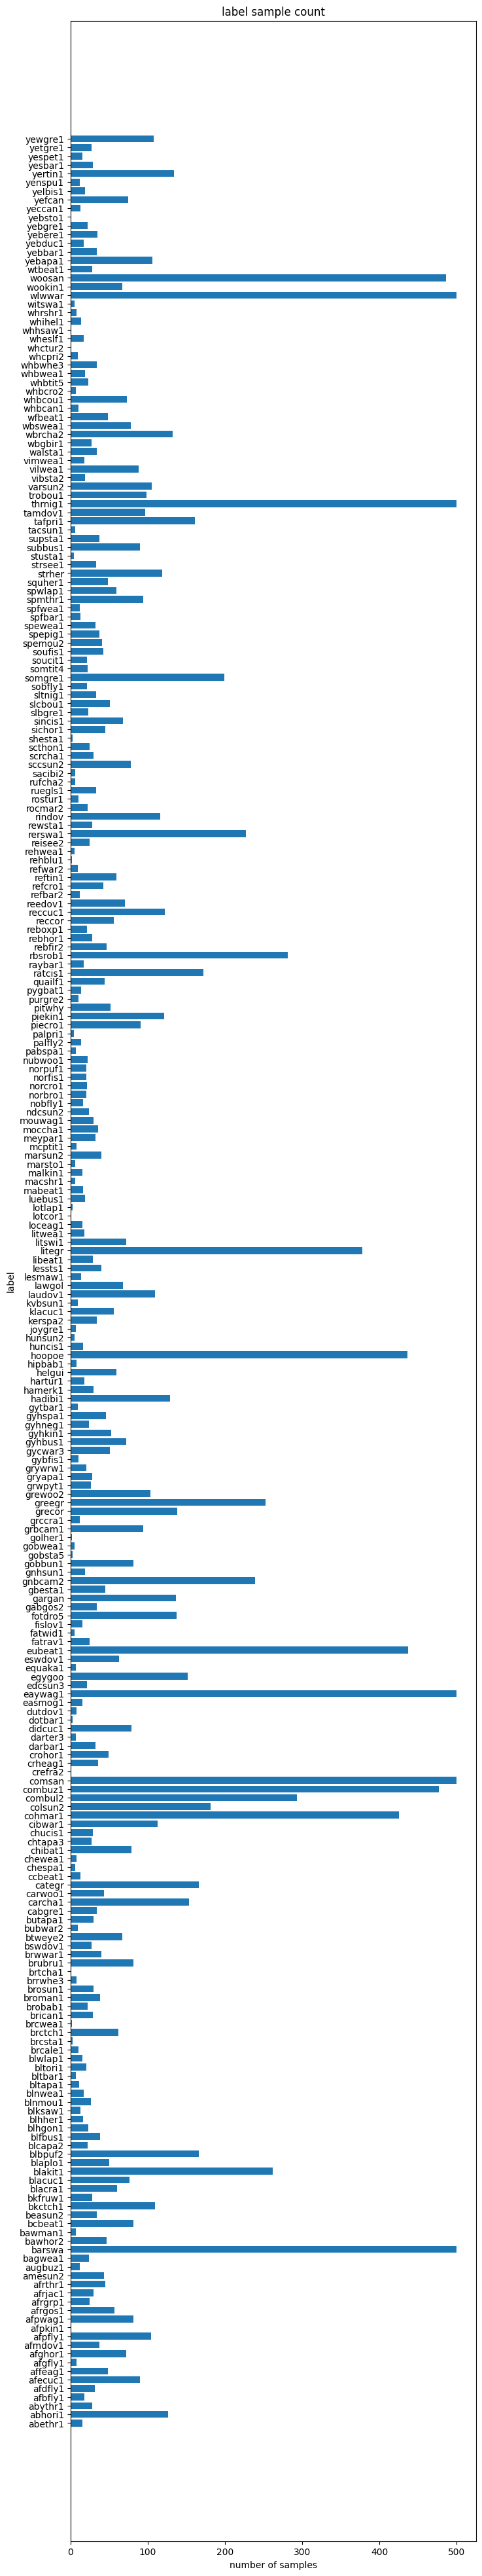

In [5]:
fig, ax = plt.subplots(figsize=(8, 50))
ax.barh(labels, counts)

ax.set_title("label sample count")
ax.set_xlabel("number of samples")
ax.set_ylabel("label")

plt.show()

In [ ]:
audio_sample_counts = summary.audio_sample_counts()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_sample_counts, bins=250, log=True)

ax.set_title("audio sample counts")
ax.set_xlabel("number of samples in audio file")
ax.set_ylabel("bucket count")
ax.ticklabel_format(style="plain", useOffset=False, axis="x") 

plt.show()

### pick a random sample and analyse its audio

In [47]:
random = dataset.pick_random()
audio_samples = np.array(random.audio_samples(Dataset.SAMPLE_RATE))

In [48]:
random.audio_file_path

'/media/william/Scratch/datasets/birdclef-2023/train_audio/wbgbir1/XC293971.ogg'

In [49]:
Audio(random.audio_file_path)

In [50]:
len(audio_samples)

1016477

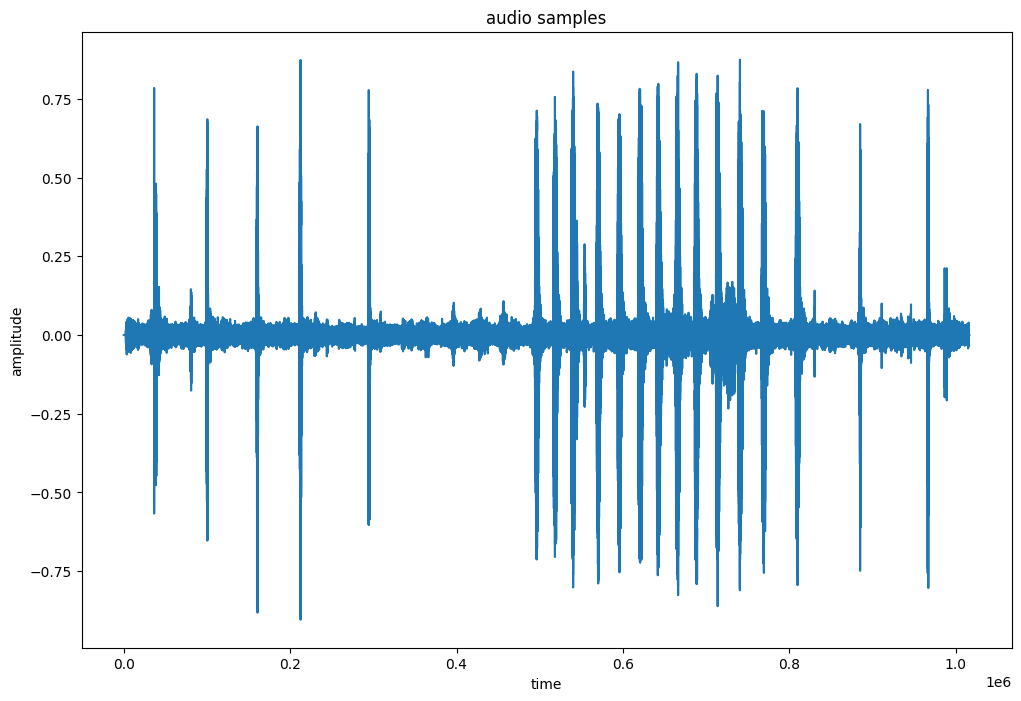

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(audio_samples)

ax.set_title("audio samples")
ax.set_xlabel("time")
ax.set_ylabel("amplitude")

plt.show()

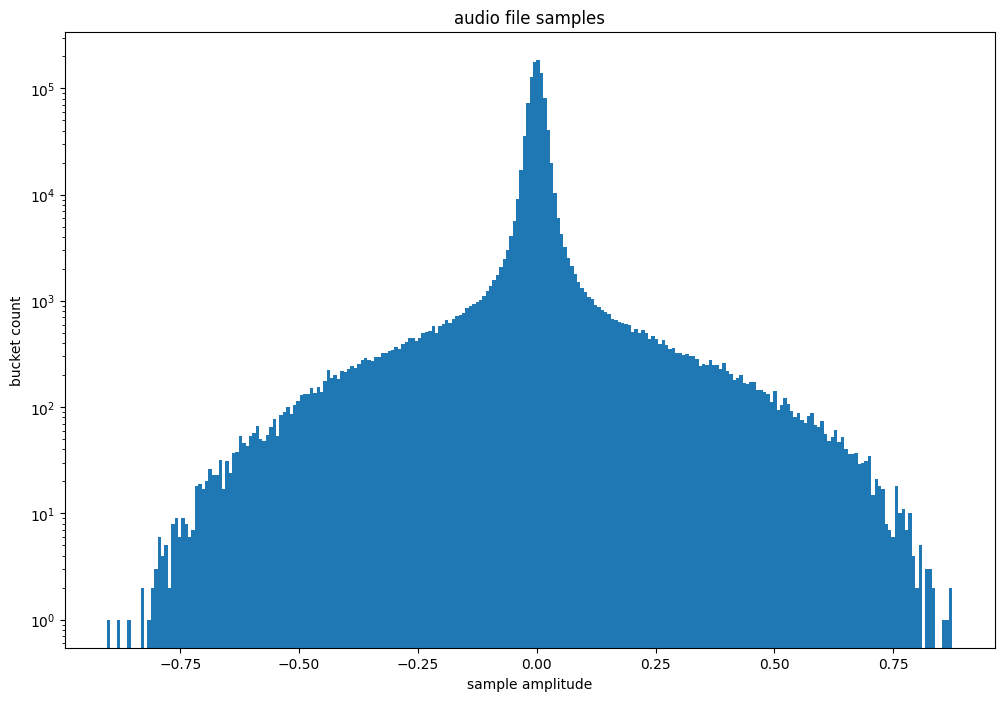

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(audio_samples, bins=250, log=True)

ax.set_title("audio file samples")
ax.set_xlabel("sample amplitude")
ax.set_ylabel("bucket count")

plt.show()

In [53]:
pipe1 = Pipeline.build_pipeline_1()
pipe2 = Pipeline.build_pipeline_2(n_components=10)
pipe3 = Pipeline.build_pipeline_3(n_components=10)

In [54]:
x1 = pipe1(audio_samples)
x2 = pipe2(audio_samples)
x3 = pipe3(audio_samples)

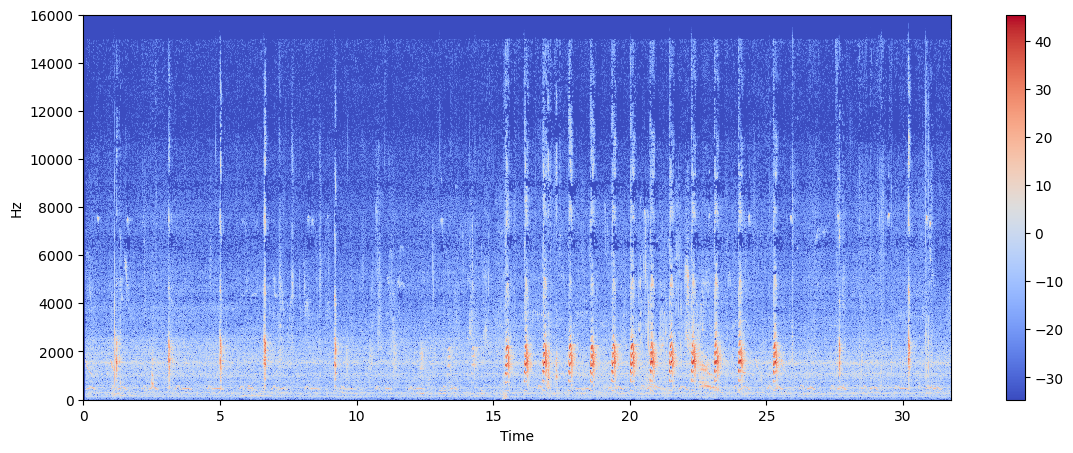

In [55]:
plt.figure(figsize=(14, 5))
specshow(x1, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [58]:
x1.shape

(1025, 1986)

In [66]:
f"{(x1.itemsize * x1.size) / 1e6}mb"

'8.1426mb'

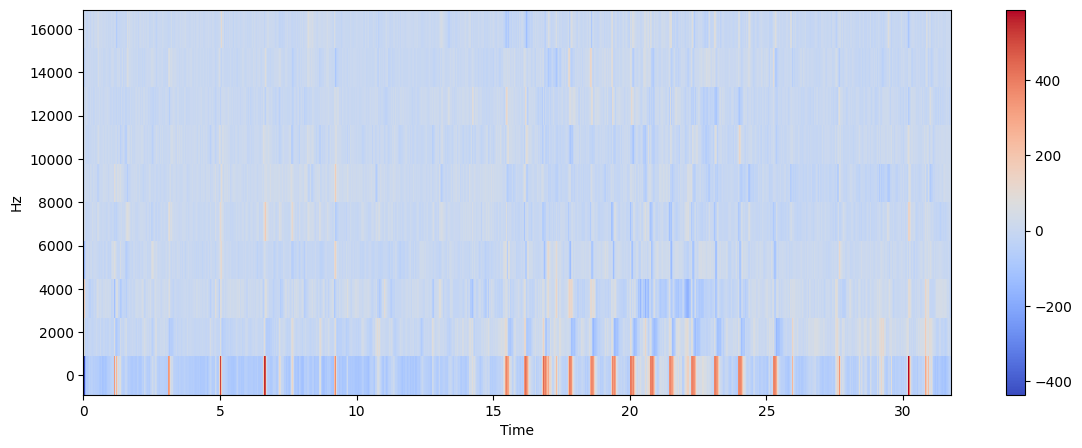

In [56]:
plt.figure(figsize=(14, 5))
specshow(x2, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [59]:
x2.shape

(10, 1986)

In [67]:
f"{(x2.itemsize * x2.size) / 1e6}mb"

'0.07944mb'

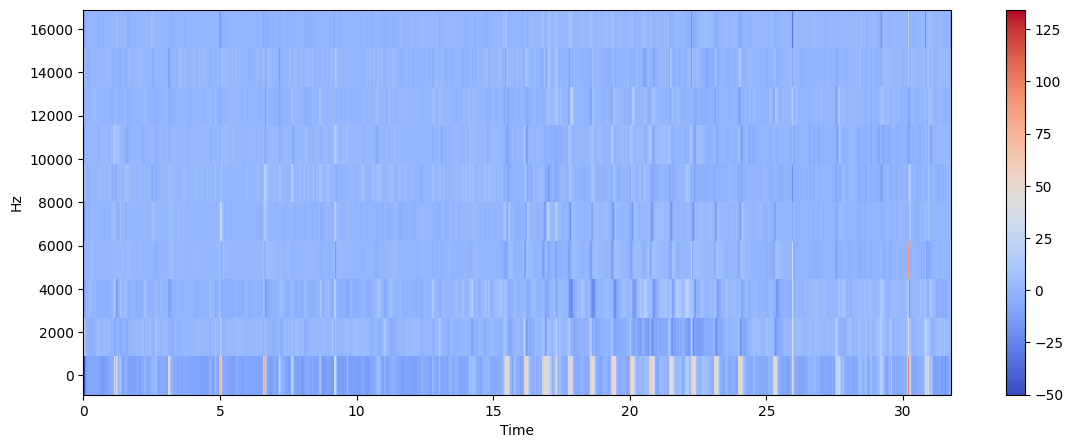

In [57]:
plt.figure(figsize=(14, 5))
specshow(x3, sr=Dataset.SAMPLE_RATE, x_axis="time", y_axis="hz")
plt.colorbar()

In [60]:
x3.shape

(10, 1986)

In [68]:
f"{(x3.itemsize * x3.size) / 1e6}mb"

'0.07944mb'